In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [2]:
import tensorflow
print (tensorflow.__version__)

2.3.0


In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!unzip /content/gdrive/MyDrive/GAN_datasets/celeb_faces.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/100k/100k/192419.jpg  
  inflating: /content/100k/100k/192420.jpg  
  inflating: /content/100k/100k/192422.jpg  
  inflating: /content/100k/100k/192424.jpg  
  inflating: /content/100k/100k/192428.jpg  
  inflating: /content/100k/100k/192429.jpg  
  inflating: /content/100k/100k/192430.jpg  
  inflating: /content/100k/100k/192435.jpg  
  inflating: /content/100k/100k/192437.jpg  
  inflating: /content/100k/100k/192438.jpg  
  inflating: /content/100k/100k/192440.jpg  
  inflating: /content/100k/100k/192442.jpg  
  inflating: /content/100k/100k/192444.jpg  
  inflating: /content/100k/100k/192445.jpg  
  inflating: /content/100k/100k/192447.jpg  
  inflating: /content/100k/100k/192448.jpg  
  inflating: /content/100k/100k/192450.jpg  
  inflating: /content/100k/100k/192456.jpg  
  inflating: /content/100k/100k/192457.jpg  
  inflating: /content/100k/100k/192460.jpg  
  inflating: /content/100k/100k/192465.jpg  
  in

In [6]:
import glob
files = glob.glob('/content/100k/100k/*.jpg')
len(files)

100000

In [7]:
for file in files[:10]:
    anime_img = cv2.imread(file)
    print (anime_img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


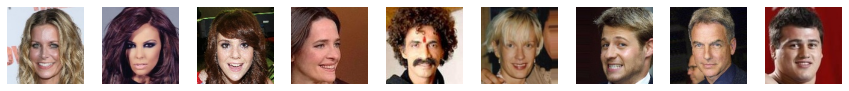

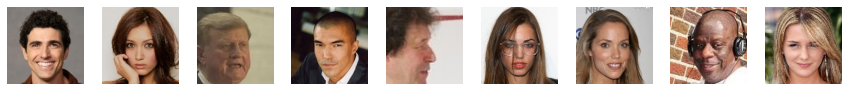

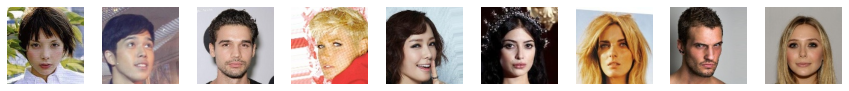

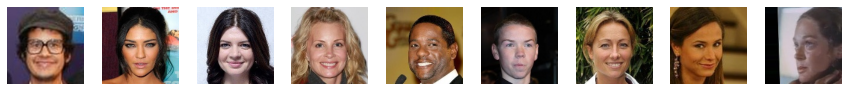

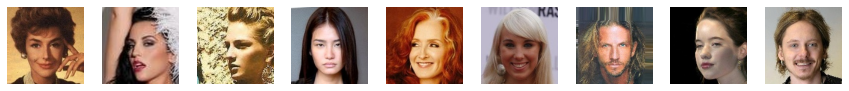

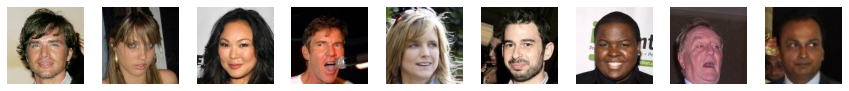

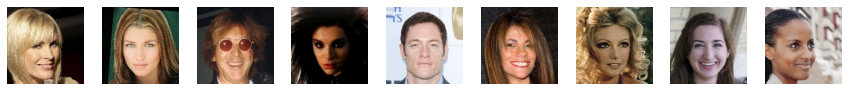

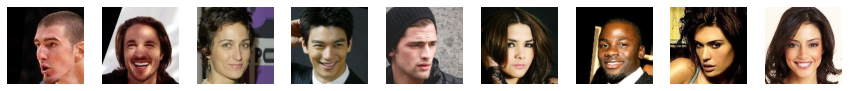

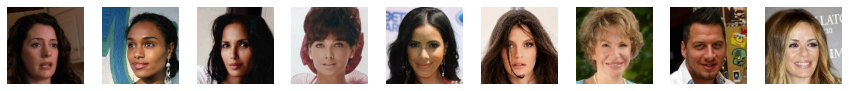

In [8]:
for k in range(9):
    plt.figure(figsize=(15, 15))
    for j in range(9):
        f = np.random.choice(files)
        celeb_img = cv2.imread(f)
        celeb_img = cv2.cvtColor(celeb_img, cv2.COLOR_BGR2RGB)
        plt.subplot(990 + 1 + j)
        plt.imshow(celeb_img)
        plt.axis('off')
        #plt.title(trainY[i])
    plt.show()

In [ ]:
from tqdm import tqdm_notebook

images = []
for file in tqdm_notebook(files):
    celeb_img = cv2.imread(file)
    celeb_img = cv2.cvtColor(celeb_img, cv2.COLOR_BGR2RGB)
    celeb_img = cv2.resize(celeb_img, (100, 100))
    images.append((celeb_img-127.5)/127.5)

images = np.array(images)
print (images.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


# Generator Model

In [12]:
random_input = tensorflow.keras.layers.Input(shape = 100)

x = tensorflow.keras.layers.Dense(64 * 7 * 7)(random_input)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Reshape((7, 7, 64))(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3,3), strides=(2,2))(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3,3), strides=(2,2))(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3,3), strides=(2,2))(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(5,5), strides=(2,2))(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3,3))(x)
x = tensorflow.keras.layers.Activation('relu')(x)

x = tensorflow.keras.layers.Conv2D(filters=3, kernel_size=(4,4))(x)
generated_image = tensorflow.keras.layers.Activation('tanh')(x)

generator_network = tensorflow.keras.models.Model(inputs=random_input, outputs=generated_image)
generator_network.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 3136)              316736    
_________________________________________________________________
activation_21 (Activation)   (None, 3136)              0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 3136)              12544     
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_15 (Conv2DT (None, 15, 15, 64)        36928     
_________________________________________________________________
activation_22 (Activation)   (None, 15, 15, 64)       

# Discriminator

In [13]:
image_input = tensorflow.keras.layers.Input(shape=(128, 128, 3))

x = tensorflow.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=2)(image_input)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=2)(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=2)(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=2)(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(5,5))(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Flatten()(x)

x = tensorflow.keras.layers.Dense(1)(x)
real_vs_fake_output = tensorflow.keras.layers.Activation('sigmoid')(x)

discriminator_network = tensorflow.keras.models.Model(inputs=image_input, outputs=real_vs_fake_output)
discriminator_network.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 63, 63, 128)       3584      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 64)        204864    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)       

In [14]:
adam_optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)
discriminator_network.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# DC GAN

In [15]:
discriminator_network.trainable=False

g_output = generator_network(random_input)
d_output = discriminator_network(g_output)

dcgan_model = tensorflow.keras.models.Model(random_input, d_output)
dcgan_model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
functional_7 (Functional)    (None, 128, 128, 3)       583555    
_________________________________________________________________
functional_9 (Functional)    (None, 1)                 516929    
Total params: 1,100,484
Trainable params: 576,771
Non-trainable params: 523,713
_________________________________________________________________


# Compiling Models

In [16]:
dcgan_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer)

# Define Data Generators

In [17]:
def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size) 
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_files = np.random.choice(files, size=batch_size)
    images = []
    for file in random_files:
        celeb_img = cv2.imread(file)
        celeb_img = cv2.cvtColor(celeb_img, cv2.COLOR_BGR2RGB)
        images.append((celeb_img-127.5)/127.5)
    real_images = np.array(images)
    return real_images

def show_generator_results(generator_network):
    for k in range(9):
        plt.figure(figsize=(11, 11))
        fake_samples = get_fake_samples(generator_network, 9, noise_size)
        fake_samples = (fake_samples+1.0)/2.0
        for j in range(9):
            plt.subplot(990 + 1 + j)
            plt.imshow(fake_samples[j])
            plt.axis('off')
            #plt.title(trainY[i])
        plt.show()
    return

# Training GAN

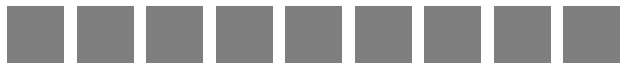

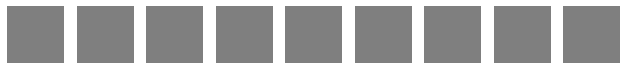

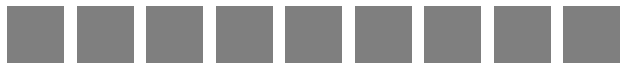

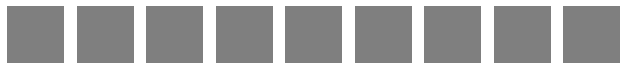

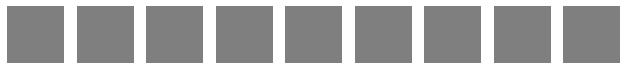

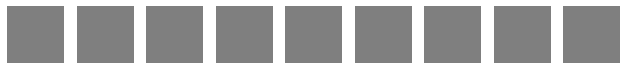

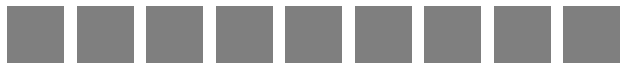

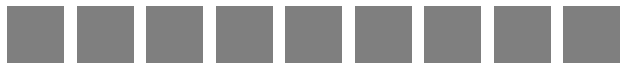

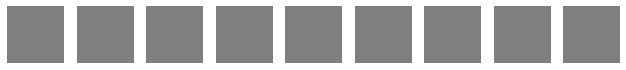

Epoch:0, Step:0, D-Loss:1.223, D-Acc:16.000, G-Loss:0.699
Epoch:0, Step:50, D-Loss:0.006, D-Acc:100.000, G-Loss:7.684
Epoch:0, Step:100, D-Loss:0.005, D-Acc:100.000, G-Loss:6.164
Epoch:0, Step:150, D-Loss:0.067, D-Acc:98.000, G-Loss:8.756
Epoch:0, Step:200, D-Loss:0.006, D-Acc:100.000, G-Loss:8.648
Epoch:0, Step:250, D-Loss:0.011, D-Acc:100.000, G-Loss:4.783
Epoch:0, Step:300, D-Loss:0.024, D-Acc:100.000, G-Loss:5.380
Epoch:0, Step:350, D-Loss:0.075, D-Acc:99.000, G-Loss:4.101
Epoch:0, Step:400, D-Loss:0.004, D-Acc:100.000, G-Loss:5.935
Epoch:0, Step:450, D-Loss:0.004, D-Acc:100.000, G-Loss:9.071
Epoch:1, Step:0, D-Loss:0.038, D-Acc:99.000, G-Loss:5.541
Epoch:1, Step:50, D-Loss:0.046, D-Acc:98.000, G-Loss:2.045
Epoch:1, Step:100, D-Loss:0.001, D-Acc:100.000, G-Loss:4.681
Epoch:1, Step:150, D-Loss:0.011, D-Acc:100.000, G-Loss:2.960
Epoch:1, Step:200, D-Loss:0.013, D-Acc:100.000, G-Loss:8.027
Epoch:1, Step:250, D-Loss:0.023, D-Acc:100.000, G-Loss:3.913
Epoch:1, Step:300, D-Loss:0.003, D-

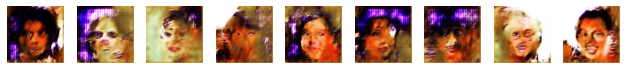

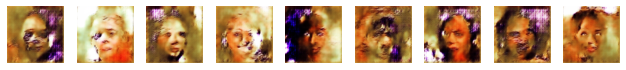

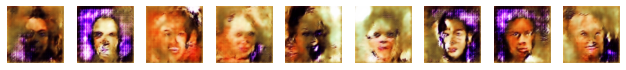

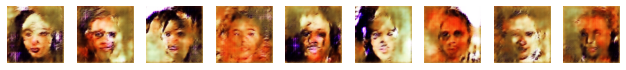

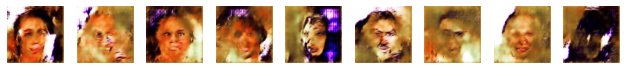

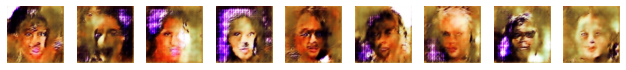

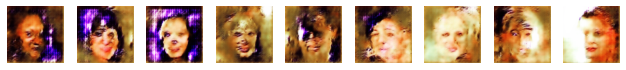

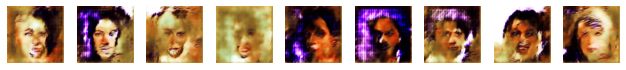

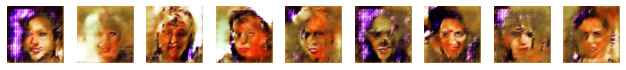

Epoch:10, Step:0, D-Loss:0.053, D-Acc:99.000, G-Loss:5.436
Epoch:10, Step:50, D-Loss:0.063, D-Acc:99.000, G-Loss:5.886
Epoch:10, Step:100, D-Loss:0.024, D-Acc:100.000, G-Loss:4.101
Epoch:10, Step:150, D-Loss:0.018, D-Acc:100.000, G-Loss:3.815
Epoch:10, Step:200, D-Loss:0.065, D-Acc:97.000, G-Loss:5.655
Epoch:10, Step:250, D-Loss:0.044, D-Acc:99.000, G-Loss:7.287
Epoch:10, Step:300, D-Loss:0.065, D-Acc:98.000, G-Loss:5.237
Epoch:10, Step:350, D-Loss:0.010, D-Acc:100.000, G-Loss:7.533
Epoch:10, Step:400, D-Loss:0.078, D-Acc:98.000, G-Loss:3.144
Epoch:10, Step:450, D-Loss:0.023, D-Acc:99.000, G-Loss:2.277
Epoch:11, Step:0, D-Loss:0.017, D-Acc:100.000, G-Loss:4.765
Epoch:11, Step:50, D-Loss:0.075, D-Acc:97.000, G-Loss:6.945
Epoch:11, Step:100, D-Loss:0.064, D-Acc:99.000, G-Loss:2.859
Epoch:11, Step:150, D-Loss:0.048, D-Acc:97.000, G-Loss:6.064
Epoch:11, Step:200, D-Loss:0.009, D-Acc:100.000, G-Loss:5.582
Epoch:11, Step:250, D-Loss:0.004, D-Acc:100.000, G-Loss:7.362
Epoch:11, Step:300, D-Lo

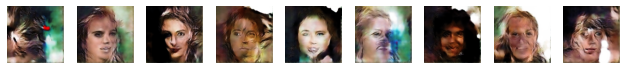

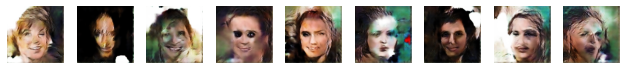

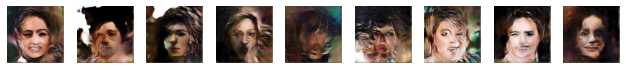

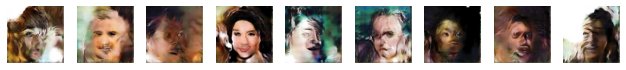

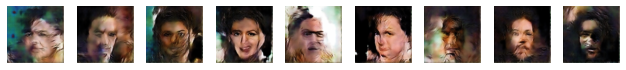

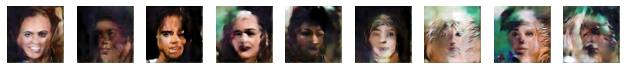

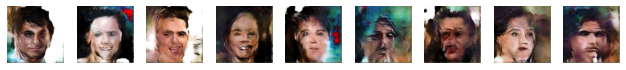

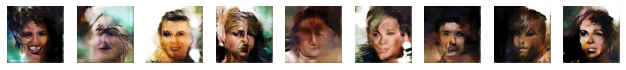

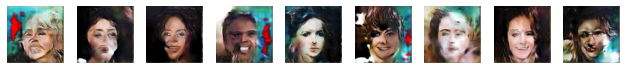

Epoch:20, Step:0, D-Loss:0.065, D-Acc:97.000, G-Loss:5.365
Epoch:20, Step:50, D-Loss:0.099, D-Acc:97.000, G-Loss:4.464
Epoch:20, Step:100, D-Loss:0.201, D-Acc:93.000, G-Loss:4.439
Epoch:20, Step:150, D-Loss:0.067, D-Acc:99.000, G-Loss:6.690
Epoch:20, Step:200, D-Loss:0.138, D-Acc:95.000, G-Loss:4.734
Epoch:20, Step:250, D-Loss:0.070, D-Acc:97.000, G-Loss:6.210
Epoch:20, Step:300, D-Loss:0.068, D-Acc:98.000, G-Loss:3.912
Epoch:20, Step:350, D-Loss:0.097, D-Acc:96.000, G-Loss:1.768
Epoch:20, Step:400, D-Loss:0.212, D-Acc:93.000, G-Loss:5.599
Epoch:20, Step:450, D-Loss:0.027, D-Acc:100.000, G-Loss:5.624
Epoch:21, Step:0, D-Loss:0.102, D-Acc:97.000, G-Loss:5.548
Epoch:21, Step:50, D-Loss:0.071, D-Acc:97.000, G-Loss:1.471
Epoch:21, Step:100, D-Loss:0.204, D-Acc:94.000, G-Loss:7.261
Epoch:21, Step:150, D-Loss:0.039, D-Acc:98.000, G-Loss:3.074
Epoch:21, Step:200, D-Loss:0.128, D-Acc:95.000, G-Loss:5.375
Epoch:21, Step:250, D-Loss:0.021, D-Acc:99.000, G-Loss:5.950
Epoch:21, Step:300, D-Loss:0.

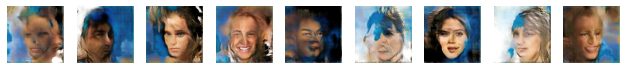

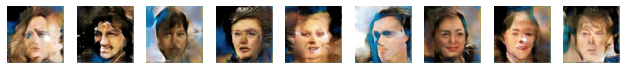

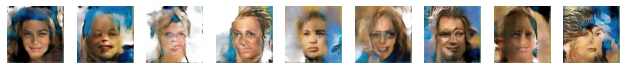

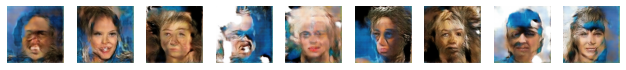

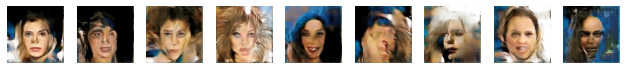

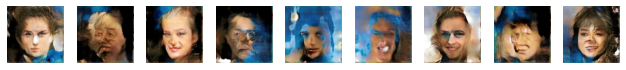

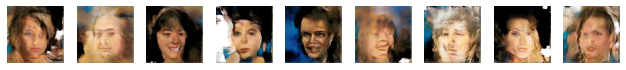

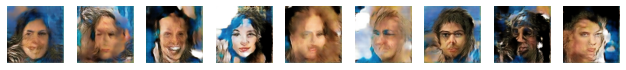

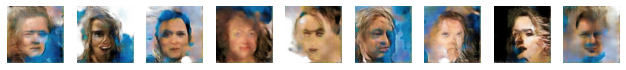

Epoch:30, Step:0, D-Loss:0.009, D-Acc:100.000, G-Loss:2.425
Epoch:30, Step:50, D-Loss:0.029, D-Acc:99.000, G-Loss:4.150
Epoch:30, Step:100, D-Loss:0.003, D-Acc:100.000, G-Loss:1.783
Epoch:30, Step:150, D-Loss:0.052, D-Acc:99.000, G-Loss:5.705
Epoch:30, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:0.212
Epoch:30, Step:250, D-Loss:0.017, D-Acc:99.000, G-Loss:9.131
Epoch:30, Step:300, D-Loss:0.021, D-Acc:99.000, G-Loss:6.780
Epoch:30, Step:350, D-Loss:0.003, D-Acc:100.000, G-Loss:1.909
Epoch:30, Step:400, D-Loss:0.002, D-Acc:100.000, G-Loss:8.332
Epoch:30, Step:450, D-Loss:0.002, D-Acc:100.000, G-Loss:9.623
Epoch:31, Step:0, D-Loss:0.021, D-Acc:99.000, G-Loss:3.818
Epoch:31, Step:50, D-Loss:0.001, D-Acc:100.000, G-Loss:6.707
Epoch:31, Step:100, D-Loss:0.007, D-Acc:100.000, G-Loss:6.762
Epoch:31, Step:150, D-Loss:0.041, D-Acc:99.000, G-Loss:0.028
Epoch:31, Step:200, D-Loss:0.004, D-Acc:100.000, G-Loss:0.043
Epoch:31, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:10.553
Epoch:31, Step:300,

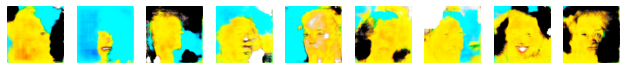

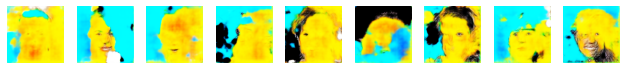

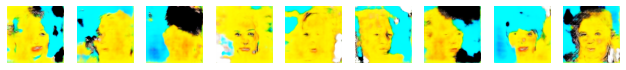

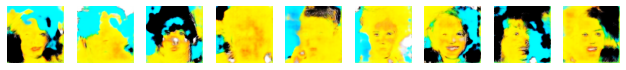

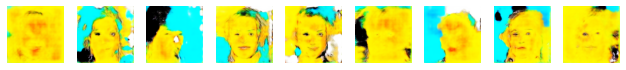

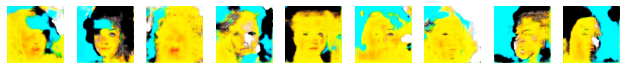

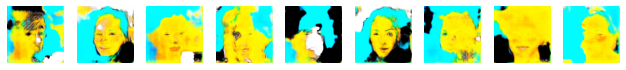

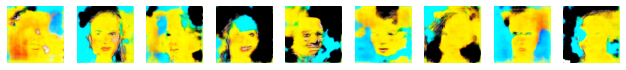

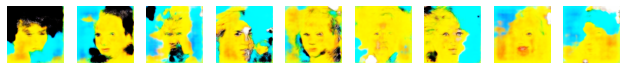

Epoch:40, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:11.035
Epoch:40, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:11.690
Epoch:40, Step:100, D-Loss:0.001, D-Acc:100.000, G-Loss:4.734
Epoch:40, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:7.220
Epoch:40, Step:200, D-Loss:0.001, D-Acc:100.000, G-Loss:0.006
Epoch:40, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:2.936
Epoch:40, Step:300, D-Loss:0.005, D-Acc:100.000, G-Loss:9.760
Epoch:40, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:11.031
Epoch:40, Step:400, D-Loss:0.003, D-Acc:100.000, G-Loss:4.833
Epoch:40, Step:450, D-Loss:0.010, D-Acc:99.000, G-Loss:8.082
Epoch:41, Step:0, D-Loss:0.003, D-Acc:100.000, G-Loss:0.055
Epoch:41, Step:50, D-Loss:0.001, D-Acc:100.000, G-Loss:0.174
Epoch:41, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:12.070
Epoch:41, Step:150, D-Loss:0.001, D-Acc:100.000, G-Loss:8.748
Epoch:41, Step:200, D-Loss:0.039, D-Acc:99.000, G-Loss:0.971
Epoch:41, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:11.010
Epoch:41, S

KeyboardInterrupt: ignored

In [18]:
epochs = 100
batch_size = 100
steps = 500
noise_size = 100

for i in range(0, epochs):
    if (i%10 == 0):
        show_generator_results(generator_network)
    for j in range(steps):
        fake_samples = get_fake_samples(generator_network, batch_size//2, noise_size)
        real_samples = get_real_samples(batch_size=batch_size//2)

        fake_y = np.zeros((batch_size//2, 1))
        real_y = np.ones((batch_size//2, 1))
        
        input_batch = np.vstack((fake_samples, real_samples))
        output_labels = np.vstack((fake_y, real_y))
        # Updating Discriminator weights
        discriminator_network.trainable=True
        loss_d = discriminator_network.train_on_batch(input_batch, output_labels)
        
        gan_input = get_random_noise(batch_size, noise_size)
        
        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        gan_output = np.ones((batch_size))
        
        # Updating Generator weights
        discriminator_network.trainable=False
        loss_g = dcgan_model.train_on_batch(gan_input, gan_output)
        
        if j%50 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.3f, D-Acc:%.3f, G-Loss:%.3f"%(i,j,loss_d[0],loss_d[1]*100,loss_g))
            

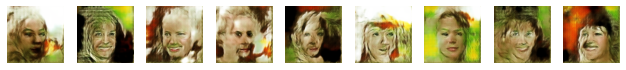

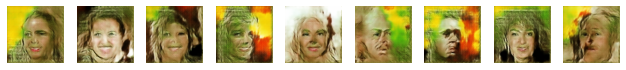

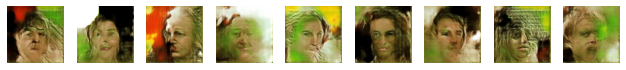

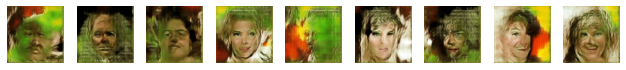

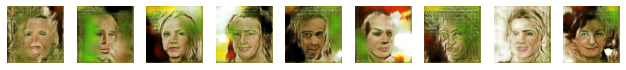

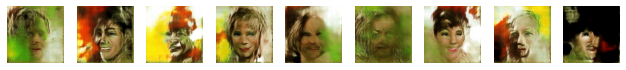

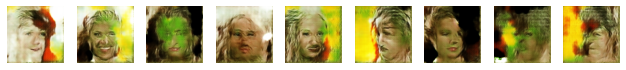

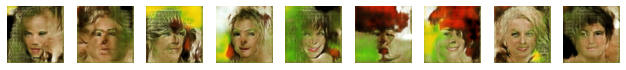

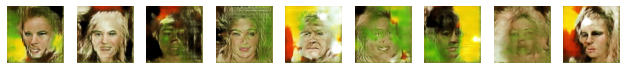

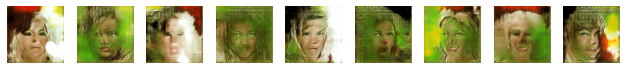

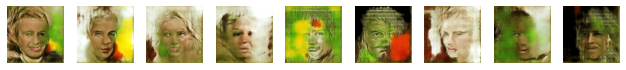

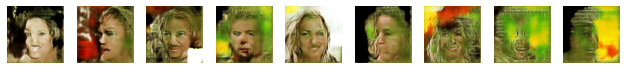

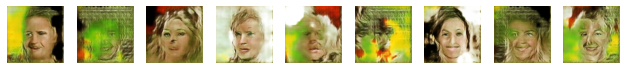

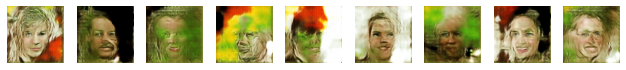

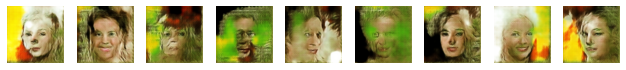

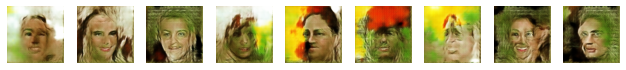

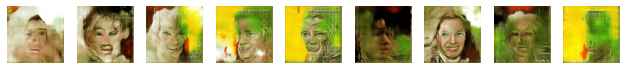

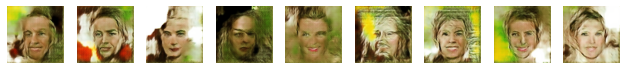

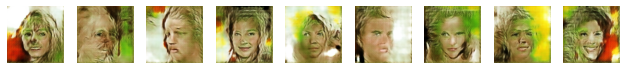

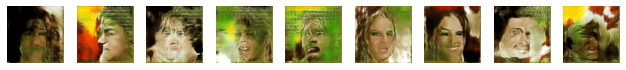

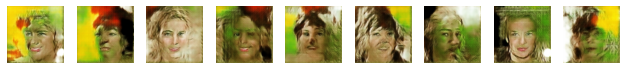

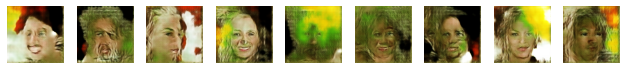

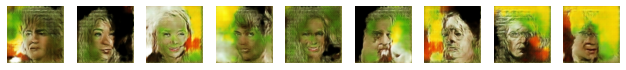

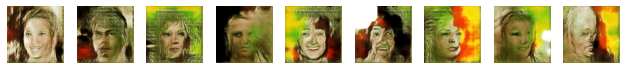

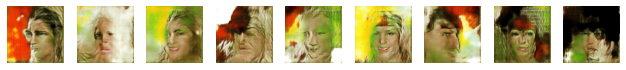

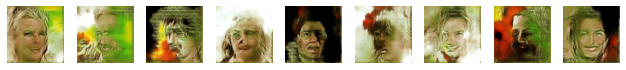

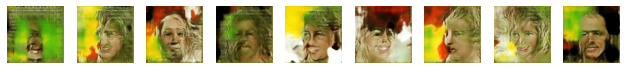

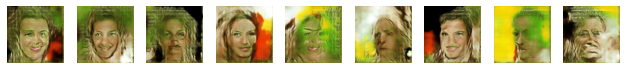

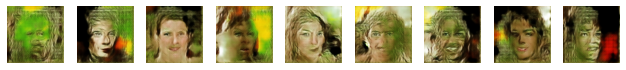

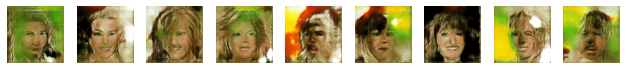

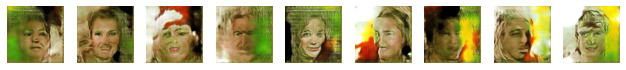

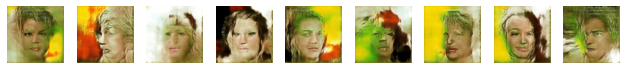

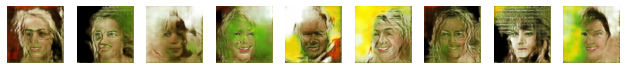

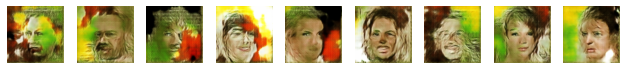

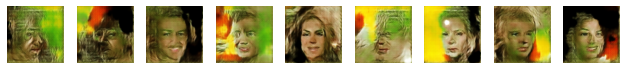

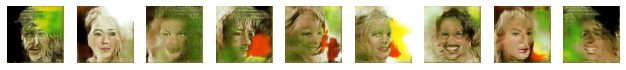

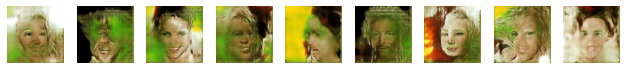

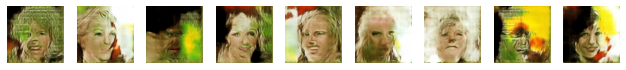

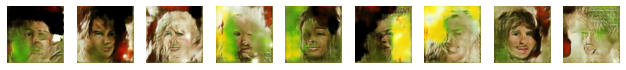

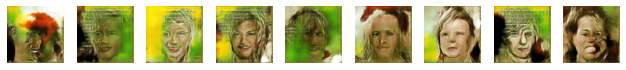

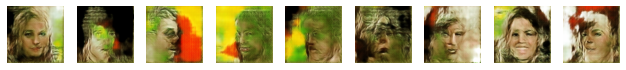

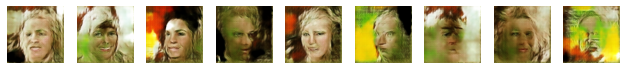

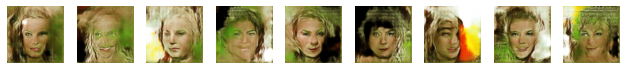

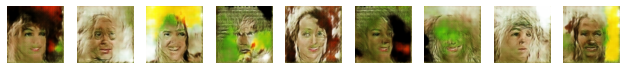

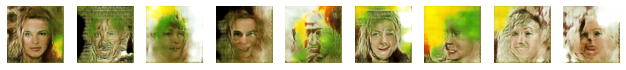

In [19]:
#Generating Unlimited samples

for i in range(5):
    show_generator_results(generator_network)